# Data Preprocessing

1. Check the NULL values
2. Convert the non-numeric data into numbers.
3. Drop columns that has very low samples

In [1]:
# Loading necessary libraries

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling 
from sklearn.pipeline import Pipeline

#sklearn Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict

# Libraries for ploting charts
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib notebook
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**Load the data for pre-processing**


In [3]:
WD1 = pd.DataFrame()

WD1 = pd.read_csv('../datasets/data.csv', low_memory=False)

**1. Check the NULL values**

In [4]:
# See NULL values in dataframe

WD1.isnull()

,make_model,make,model,generation,year_from,year_to,series,trim,body_type,load_height_mm,...,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h,male,female,unknown,total
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43042,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
43043,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
43044,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False
43045,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,False,False,False,False


In [5]:
# Sum to check total NULL values in each column

WD1.isnull().sum()

make_model             0
make                   0
model                  0
generation             4
year_from            127
                   ...  
charging_time_h    43041
male                   0
female                 0
unknown                0
total                  0
Length: 82, dtype: int64

In [6]:
MV = pd.DataFrame(columns=['features', 'missing_values'])

# Missing values in percentage
for column in WD1.columns:
    if WD1[column].isnull().sum() > 0:
      MV = MV.append({'features': column, 'missing_values': (WD1[column].isnull().sum() / WD1[column].shape[0])*100}, ignore_index=True)
      
      print(column, ': {:.2%}'.format(WD1[column].isnull().sum() / WD1[column].shape[0]))

display(MV)

generation : 0.01%
year_from : 0.30%
year_to : 0.74%
body_type : 25.14%
load_height_mm : 96.66%
number_of_seats : 7.93%
length_mm : 7.97%
width_mm : 7.97%
height_mm : 7.97%
wheelbase_mm : 7.97%
front_track_mm : 28.10%
rear_track_mm : 28.10%
curb_weight_kg : 21.40%
wheel_size_r14 : 87.93%
ground_clearance_mm : 43.45%
trailer_load_with_brakes_kg : 79.86%
payload_kg : 62.94%
back_track_width_mm : 83.99%
front_track_width_mm : 83.99%
clearance_mm : 84.77%
full_weight_kg : 36.35%
front_rear_axle_load_kg : 91.58%
max_trunk_capacity_l : 31.00%
cargo_compartment_length_width_height_mm : 98.75%
cargo_volume_m3 : 99.41%
minimum_trunk_capacity_l : 27.17%
maximum_torque_n_m : 13.89%
injection_type : 16.75%
overhead_camshaft : 100.00%
cylinder_layout : 13.92%
number_of_cylinders : 13.92%
compression_ratio : 89.94%
engine_type : 13.62%
valves_per_cylinder : 14.21%
boost_type : 60.99%
cylinder_bore_mm : 26.03%
stroke_cycle_mm : 26.05%
engine_placement : 89.81%
cylinder_bore_and_stroke_cycle_mm : 99.9

,features,missing_values
0,generation,0.009292
1,year_from,0.295026
2,year_to,0.74105
3,body_type,25.139963
4,load_height_mm,96.664111
...,...,...
68,safety_assessment,98.232165
69,rating_name,98.232165
70,battery_capacity_KW_per_h,99.974447
71,electric_range_km,99.979093


<AxesSubplot:title={'center':'Missing Values in each columns (%)'}, xlabel='features'>

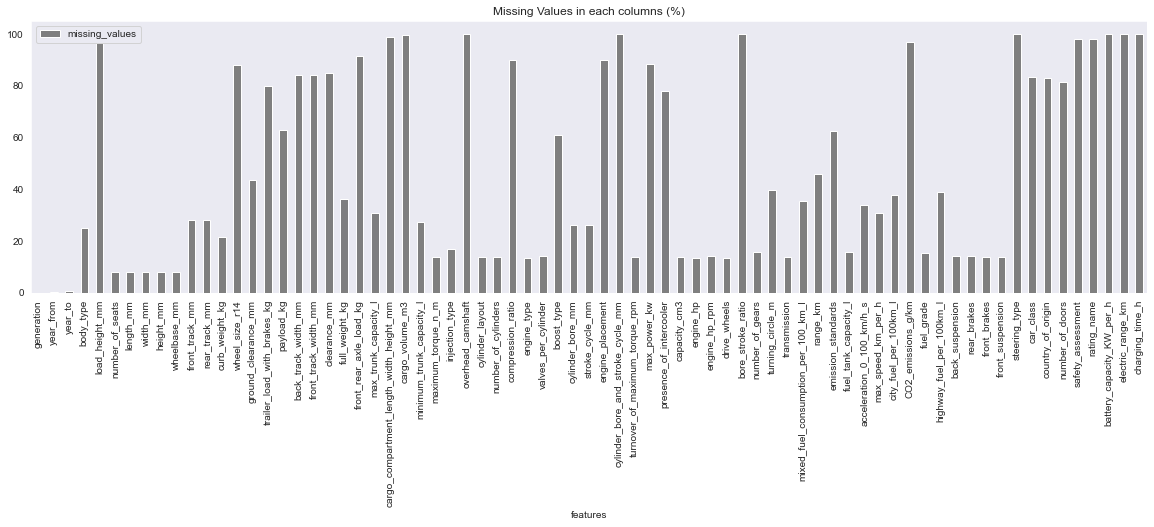

In [7]:
# Bar plot to visualize the missing values in each column

sb.set_style("dark")
MV['missing_values'] = pd.to_numeric(MV['missing_values'], errors='coerce')
MV.plot(x="features",kind="bar", title="Missing Values in each columns (%)",figsize=(20,5), color="#7f7f7f")

**2. Convert the non-numeric data into numbers.**

In [8]:
# Convert the non-numeric data into numbers.

le = LabelEncoder()
WD1['make'] = le.fit_transform(WD1['make'])
WD1['model'] = le.fit_transform(WD1['model'])

**3. Drop columns that has very low rows or are irrelavent in prediction**

In [9]:
# Function to pre-process the data
def data_preprocessing(data,target, do_pca = 0):
    if(do_pca == 0):
        data = drop_columns(data)
    data = check_NAN(data)
    data = convert_categorical_to_numerical(data)
    data = scaling(data)
    print("Hurrey! Pre-Processing completed!")
    return data

# Function to convert the categorical values into numerical values
def convert_categorical_to_numerical(data,unique_val=10):
    data = data.apply(lambda x: pd.factorize(x)[0])
    print("Conversion is successfull")
    return data

# Drop the unneccessary and irrelevant columns
def drop_columns(data):
    drop_columns =['make_model','make','year_from','year_to','injection_type','cylinder_layout',
                       'turnover_of_maximum_torque_rpm','engine_hp_rpm','front_brakes','front_suspension',
                       'acceleration_0_100_km/h_s','back_track_width_mm','boost_type','car_class',
                       'cargo_compartment_length_width_height_mm','back_suspension',
                       'cargo_volume_m3','CO2_emissions_g/km','clearance_mm','compression_ratio','country_of_origin',
                       'cylinder_bore_and_stroke_cycle_mm','engine_placement','emission_standards',
                       'front_track_width_mm','front_rear_axle_load_kg','load_height_mm','max_power_kw',
                       'number_of_doors','range_km',
                       'overhead_camshaft', 'payload_kg',
                       'presence_of_intercooler', 'bore_stroke_ratio',
                      'steering_type','trailer_load_with_brakes_kg', 'battery_capacity_KW_per_h','electric_range_km',
                       'charging_time_h',
                      'rating_name', 'safety_assessment','trim','wheel_size_r14','male','female','unknown',
                      
                       'cylinder_bore_mm','full_weight_kg','back_track_width_mm','front_track_width_mm',
                       'ground_clearance_mm','highway_fuel_per_100km_l','length_mm','width_mm','height_mm',
                       'wheelbase_mm','front_track_mm','rear_track_mm',
                        'minimum_trunk_capacity_l','maximum_torque_n_m',
                       'mixed_fuel_consumption_per_100_km_l',
                       'stroke_cycle_mm','turning_circle_m'
                      ]
    print("Oh no! Columns Dropped")
    return data.drop(columns=drop_columns, axis=1)

# Function to convert the string columns into float
def convertToFloat(data, col):
    data[col] = pd.to_numeric(data[col], errors='coerce')
    return data

# Function to check for Nan values and fill with mean value of the column
def check_NAN(data):
    cols = ['capacity_cm3','curb_weight_kg','engine_hp','city_fuel_per_100km_l',
          'number_of_cylinders',
           'number_of_gears',
           'max_speed_km_per_h','valves_per_cylinder',
          ]
    cols = data.columns
    for col in cols:
        if(data.dtypes[col] == 'int64'):
            data = convertToFloat(data, col)
            data[col].fillna(int(data[col].median()), inplace=True)
        
    print("Yeah! Fixed Nan values!")
    return data

def scaling(X):
    columns = X.columns
    scaler = StandardScaler()
    scaler = MinMaxScaler()
    X_std = scaler.fit_transform(X)
    X_std = pd.DataFrame(X_std, columns = columns)
    return X_std

In [10]:
data1 = data_preprocessing(WD1,'total', do_pca = 0)
data_pca = data_preprocessing(WD1,'total', do_pca = 1)

Oh no! Columns Dropped
Yeah! Fixed Nan values!
Conversion is successfull
Hurrey! Pre-Processing completed!
Yeah! Fixed Nan values!
Conversion is successfull
Hurrey! Pre-Processing completed!


In [11]:
data1

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,...,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes,total
0,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,...,0.002160,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909,0.0
1,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,...,0.002160,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909,0.0
2,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,...,0.004320,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909,0.0
3,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,...,0.004320,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909,0.0
4,0.000000,0.000876,0.000000,0.066667,0.034483,0.001342,0.000947,0.222222,0.111111,0.166667,...,0.006479,0.166667,0.1,0.166667,0.007353,0.000000,0.003636,0.090909,0.090909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43042,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,...,0.838013,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818,1.0
43043,0.998943,0.000876,0.003891,0.200000,0.034483,0.077181,0.002841,0.111111,0.111111,0.333333,...,0.196544,0.166667,0.2,0.333333,0.161765,0.304167,0.000000,0.136364,0.181818,1.0
43044,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,...,0.663067,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818,1.0
43045,1.000000,0.000876,0.003891,0.200000,0.034483,0.414765,0.558712,0.111111,0.111111,0.333333,...,0.313175,0.166667,0.2,0.333333,0.558824,0.758333,0.000000,0.136364,0.181818,1.0


In [13]:
# Save processed data 
data1.to_csv('../datasets/data-preprocessed.csv', encoding='utf-8', index=False)

data_pca.to_csv('../datasets/data-pca-preprocessed.csv', encoding='utf-8', index=False)